In [1]:
import os
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd

In [5]:
# from google.colab import drive
# drive.mount('./drive')

Mounted at ./drive


In [2]:
path = '/content/homer_bart.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
Dataset_path='/content/homer_bart/training_set'
#we nee the dataset as imagenet dataset ie we neet labels.csv

In [4]:
class_names = []
for folder_name in os.listdir(Dataset_path):
  class_names.append(folder_name)

In [5]:
class_names

['homer', 'bart']

In [6]:
os.listdir(Dataset_path)

['homer', 'bart']

In [14]:
#Load the data
dls = ImageDataLoaders.from_folder(
    path=Dataset_path,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

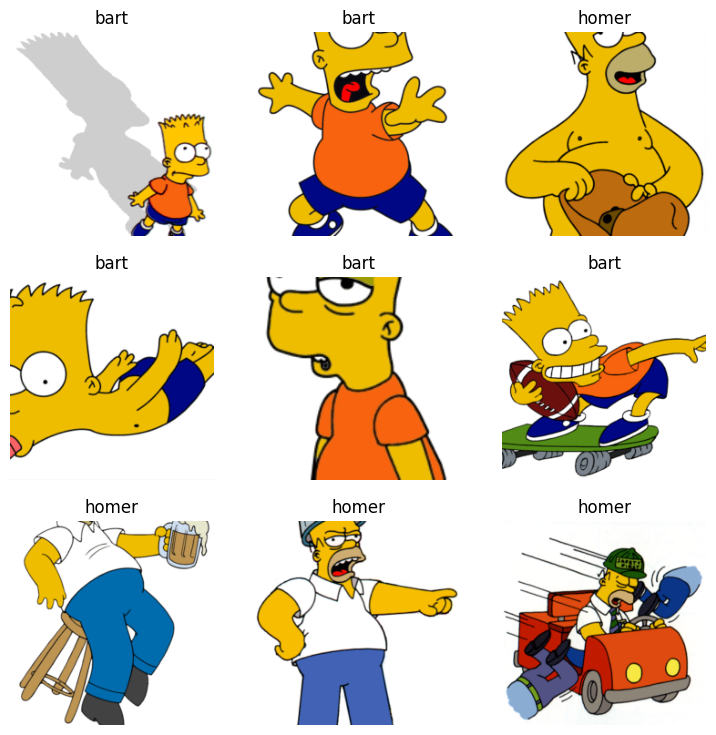

In [15]:
dls.show_batch()

In [16]:
#create model
model=vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy,error_rate]
)

In [17]:
model.fit(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.030224,0.525463,0.860465,0.139535,01:17


In [18]:
# model.fine_tune(
#     epochs=1
# )

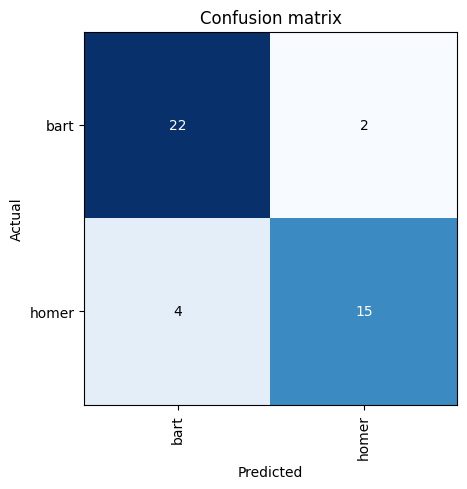

In [19]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

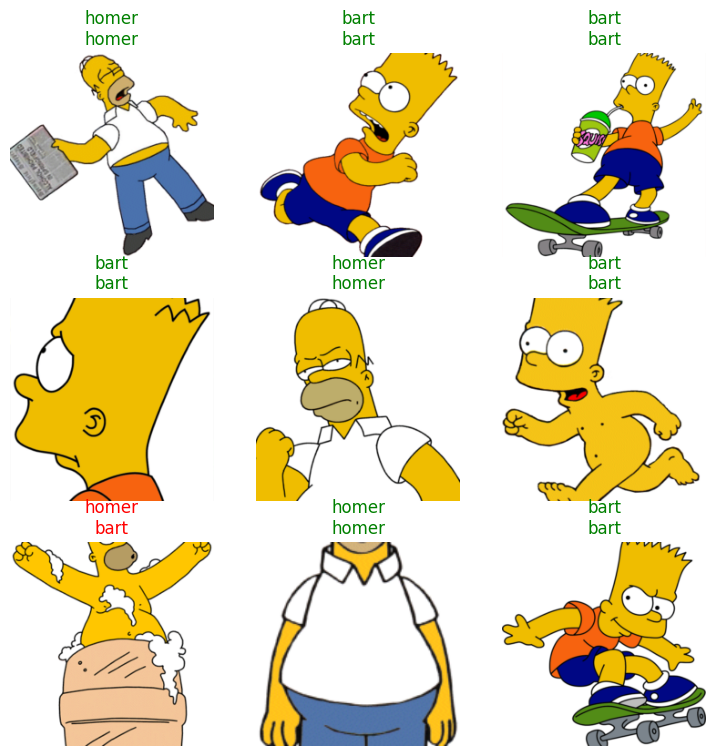

In [21]:
model.show_results()

In [22]:
#save model
model.export('homer_bart_classifier.pkl')

In [23]:
#load the model
new_model = load_learner('/content/homer_bart/training_set/homer_bart_classifier.pkl')

In [24]:
new_model.predict(
    item='/content/homer_bart/training_set/bart/bart100.bmp'
)

('bart', tensor(0), tensor([9.9979e-01, 2.0637e-04]))